<h1>In Depth: Linear Regression</h1><br>
https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

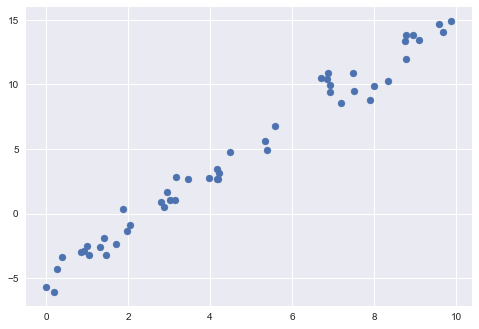

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x -5 + rng.randn(50)
plt.scatter(x,y)

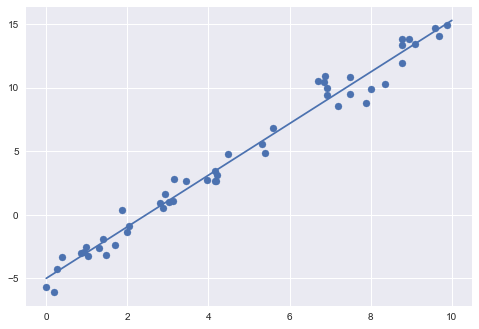

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [4]:
print("Model slope: ", model.coef_[0])
print("Model intercept: ", model.intercept_)

Model slope:  2.027208810360695
Model intercept:  -4.998577085553202


y = a0 + a1x1 + a2x2 + ....<br>
where there are multiple x values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions

In [9]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100,3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

0.5000000000000127
[ 1.5 -2.   1. ]


<h2>Polynomial basis functions</h2>

In [10]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [11]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

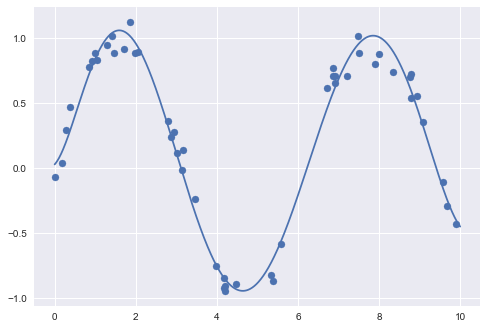

In [12]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit);

<h2>Gaussian basis functions</h2><br>
Other basis functions are possible. For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.

(0, 10)

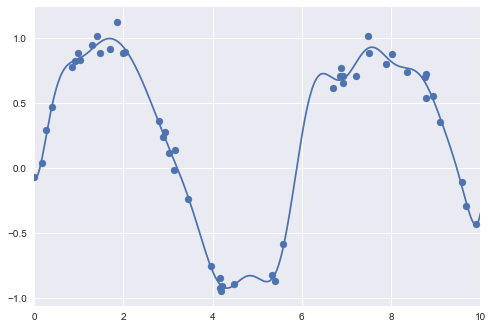

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    #Uniformly spaced Gaussian features for one-dimensional input
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x-y) / width
        return np.exp(-0.5 * np.sum(arg **2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())  

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)
            
        

We put this example here just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process of your data that makes you think one basis or another might be appropriate, you can use them as well.

<h2>Regularization</h2>


(-1.5, 1.5)

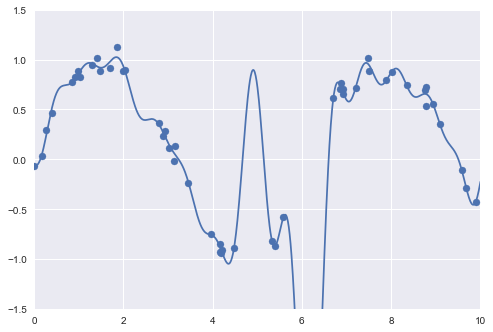

In [17]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x,y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0,10)
plt.ylim(-1.5, 1.5)

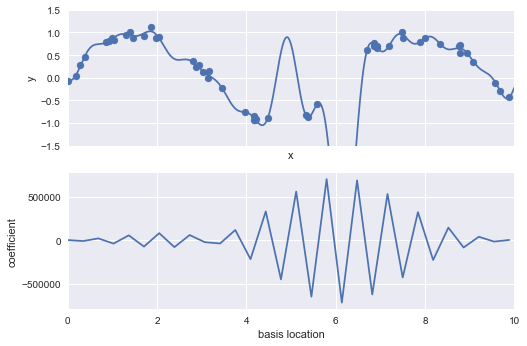

In [19]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The lower panel of this figure shows the amplitude of the basis function at each location. This is typical over-fitting behavior when basis functions overlap:the coefficients of adjacent basis functions blow up and cancel each other out. We know that such behavior is problematic, and it would be nice if we could limit such spikes explicitly in the model by penalizaing large values of the model parameters.

<h2>Ridge regression (L2 Regularization)</h2>

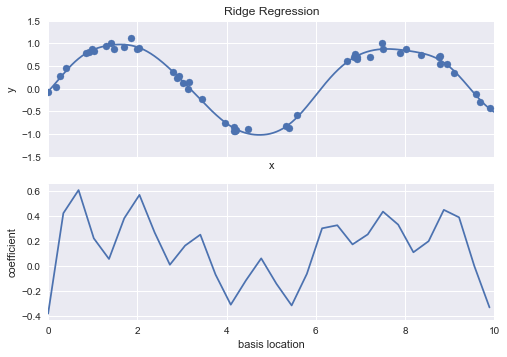

In [25]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.01))
basis_plot(model, title = 'Ridge Regression')

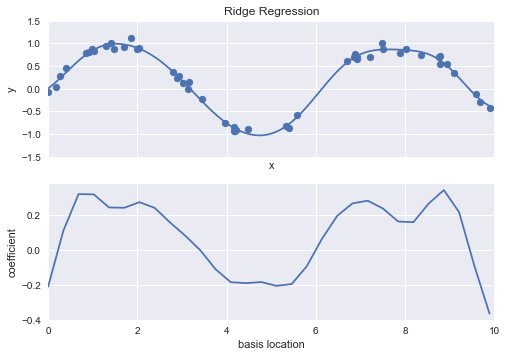

In [26]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title = 'Ridge Regression')

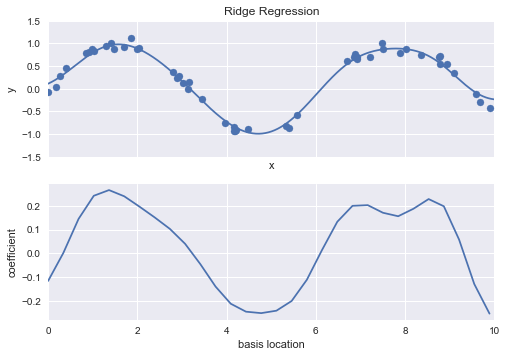

In [24]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=1.0))
basis_plot(model, title = 'Ridge Regression')

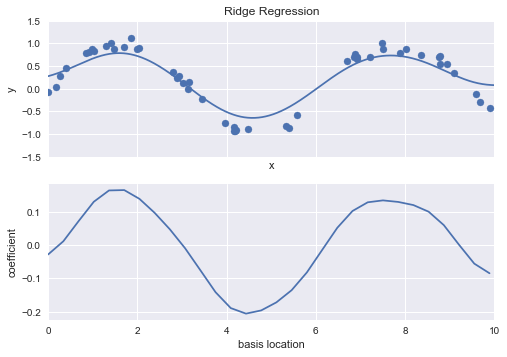

In [29]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=10.0))
basis_plot(model, title = 'Ridge Regression')

<h2>Lasso regression (L1 regularization)</h2><br>
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor sparse models where possible: that is , it preferentially sets model coefficients to exactly zero.

/Users/gonsoomoon/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


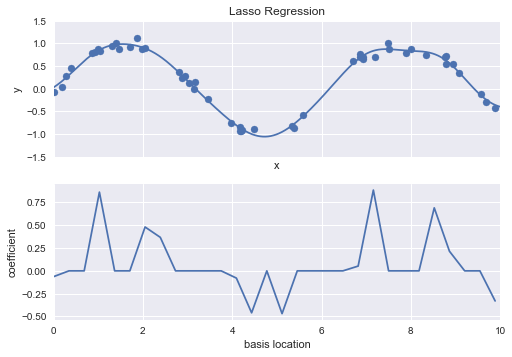

In [31]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

<h2>Predicting Bicycle Traffic</h2>

In [75]:
import pandas as pd
counts = pd.read_csv('../input/FremontBridge.csv', index_col='Date', parse_dates=True)


In [76]:
counts.head(2)

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0


In [77]:
weather = pd.read_csv('../input/seattle_weather.csv', index_col='DATE',
                     parse_dates=True)
weather.head(2)

,STATION,NAME,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WT01,WT02,...,WT09,WT11,WT13,WT14,WT16,WT17,WT18,WT19,WT21,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-01,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.40,0.0,0.0,NaN,52.0,45.0,1.0,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2010-01-02,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.06,0.0,0.0,NaN,47.0,43.0,1.0,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [78]:
daily = counts.resample('d').sum()
#print(daily.head())
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


In [79]:
days = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [80]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [82]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


(8, 17)

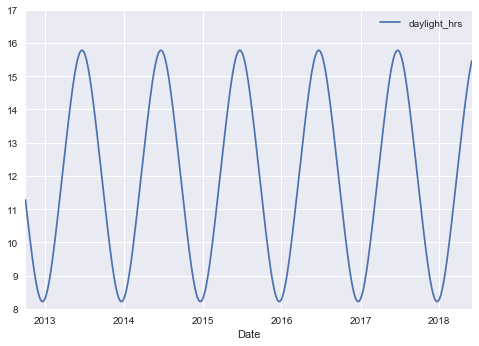

In [83]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [84]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

In [85]:
# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
weather.head()

,STATION,NAME,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WT01,WT02,...,WT13,WT14,WT16,WT17,WT18,WT19,WT21,WT22,Temp (C),dry day
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-01,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.001575,0.0,0.0,NaN,5.2,4.5,1.0,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.85,0
2010-01-02,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.000236,0.0,0.0,NaN,4.7,4.3,1.0,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.50,0
2010-01-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.000118,0.0,0.0,NaN,4.8,3.9,1.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.35,0
NaT,USW00024233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-01-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.000551,0.0,0.0,NaN,5.0,4.4,1.0,1.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.70,0


In [86]:
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])


In [67]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,5.60,1
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,5.65,1
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,5.95,1
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,6.05,1
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,6.05,1


In [88]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [89]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,5.60,1,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,5.65,1,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,5.95,1,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,6.05,1,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,6.05,1,0.010959


In [90]:
daily.dropna(axis=0, how='any', inplace=True)
column_names = ['Mon', 'Tue', 'Wed','Thu','Fri', 'Sat', 'Sun','holiday',
               'daylight_hrs', 'PRCP','dry day','Temp (C)','annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X,y)
daily['predicted'] = model.predict(X)

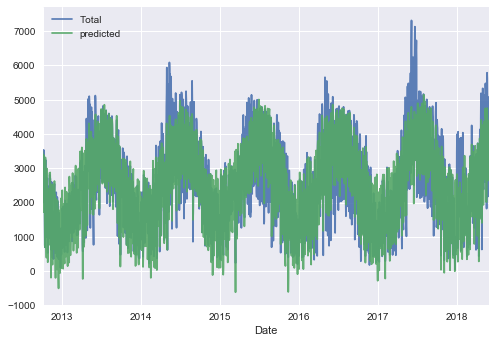

In [92]:
daily[['Total','predicted']].plot(alpha=0.9)

It is evident that we have missed some key features, especially during the summer time. Either our features are not complete(i.e. people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have faild to take into account(e.g., perhaps people ride less at both high and low temperatures).Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [93]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon               -820.790746
Tue               -638.817032
Wed               -641.130309
Thu               -804.990632
Fri              -1122.741857
Sat              -2471.732604
Sun              -2551.259792
holiday          -1128.651019
daylight_hrs       124.021590
PRCP           -172878.940501
dry day            509.742512
Temp (C)           395.801272
annual              58.660649
dtype: float64

These numbers are difficult to interpret without some measure of their uncertainty. We can compute these uncertainties quickly using bootstrap resamplings of the data

In [95]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X,y)).coef_ for i in range(1000)],0)

In [97]:
print(pd.DataFrame({'effect':params.round(0), 'error':err.round(0)}))

                effect    error
Mon             -821.0     75.0
Tue             -639.0     76.0
Wed             -641.0     76.0
Thu             -805.0     75.0
Fri            -1123.0     74.0
Sat            -2472.0     73.0
Sun            -2551.0     73.0
holiday        -1129.0    146.0
daylight_hrs     124.0      8.0
PRCP         -172879.0  11612.0
dry day          510.0     28.0
Temp (C)         396.0     18.0
annual            59.0      7.0


We first see that there is a relatively stable trend in the weekly baseline: there are  many more riders on weekdays than on weekends and holidays. We see that for each additional hour of daylight, 
124+-8 more people choose to ride;a temperature increase of one degree Celsius encourages 396+-18 people to grab their bicycle; a dry day means an average of 510+-28 more riders, and each inch of precipitation means 172879+-11612 more people leave their bike at home. Once all these effects are accounted for, we see a modest increase of 59+-7 new daily riders each year


We have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days). 